In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [2]:
MOM_IC = xr.open_dataset('Initial_state.nc')

In [3]:
MOM_IC

<xarray.Dataset>
Dimensions:          (lath: 2, lonh: 40, latq: 3, lonq: 41, Layer: 20,
                      Interface: 21, Time: 1)
Coordinates:
  * lath             (lath) float64 32.5 37.5
  * lonh             (lonh) float64 2.5 7.5 12.5 17.5 ... 187.5 192.5 197.5
  * latq             (latq) float64 30.0 35.0 40.0
  * lonq             (lonq) float64 0.0 5.0 10.0 15.0 ... 190.0 195.0 200.0
  * Layer            (Layer) float64 0.025 0.075 0.125 ... 0.875 0.925 0.975
  * Interface        (Interface) float64 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0
  * Time             (Time) timedelta64[ns] 00:00:00
Data variables: (12/19)
    Temp             (Time, Layer, lath, lonh) float64 ...
    Salt             (Time, Layer, lath, lonh) float64 ...
    h                (Time, Layer, lath, lonh) float64 ...
    u                (Time, Layer, lath, lonq) float64 ...
    v                (Time, Layer, latq, lonh) float64 ...
    p_surf_EOS       (Time, lath, lonh) float64 ...
    ...               ...
    diffu            (Time, Layer, lath, lonq) float64 ...
    diffv            (Time, Layer, latq, lonh) float64 ...
    ubtav            (Time, lath, lonq) float64 ...
    vbtav            (Time, latq, lonh) float64 ...
    DTBT             (Time) timedelta64[ns] ...
    eta              (Time, Interface, lath, lonh) float64 ...
Attributes:
    filename:  ./Initial_state.nc

In [4]:
ideal_salt = xr.zeros_like(MOM_IC.Salt) + (MOM_IC.eta.isel(Interface = 0)-MOM_IC.h.cumsum('Layer')+MOM_IC.h/2)*(36-34)/(-4000) + 34


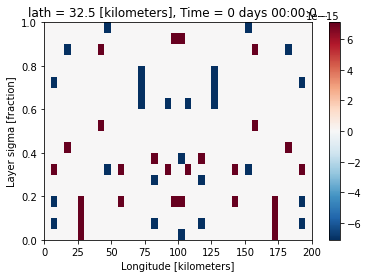

In [5]:
(ideal_salt - MOM_IC.Salt).isel(lath = 0).plot()

KHTH0-MINTHICK1e-12-MWIPGF
1.6304857e-05
KHTH0-MINTHICK1e-12
5.1215846e-13
KHTH0-MINTHICK1e-1-MWIPGF
1.6304857e-05
KHTH0-MINTHICK1e-1
5.1215846e-13
KHTH0-MINTHICK1e-1-MontgP
0.0026135002
KHTH0-MINTHICK1e-12-MontgP
0.0026135002


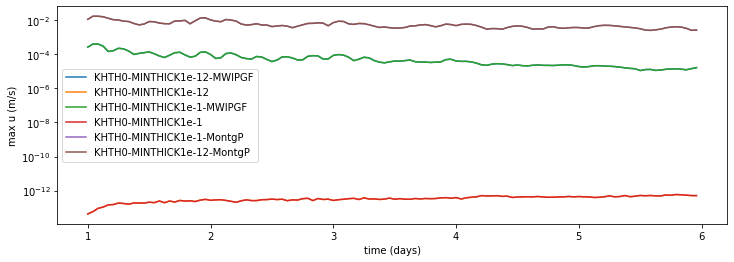

In [2]:
fig, axes = plt.subplots(figsize = (12,4))
for i in np.arange(6):
    label = ['KHTH0-MINTHICK1e-12-MWIPGF','KHTH0-MINTHICK1e-12',
             'KHTH0-MINTHICK1e-1-MWIPGF','KHTH0-MINTHICK1e-1',
             'KHTH0-MINTHICK1e-1-MontgP','KHTH0-MINTHICK1e-12-MontgP'][i]
    prog = xr.open_dataset('archive/prog-'+label+'.nc')
    plt.plot(np.arange(len(prog.Time))/24+1,prog.u.max(['xq','yh','zl']).values, label = label)
    print(label)
    print(prog.u.max(['xq','yh','zl']).values[-1])
plt.ylabel('max u (m/s)')
plt.xlabel('time (days)')
plt.legend()
plt.yscale('log')
plt.show()
#prog.u.isel(yh = 0, Time = -1).plot()